In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
#install packages
!pip install geopy
!pip install lxml
!pip install folium
print('Installed.')

Installed.


In [5]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim 
from pandas.io.json import json_normalize 
import requests

import folium #map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paris

In [7]:
paris = pd.read_csv('fr_postal_codes.csv',sep = ',',encoding = 'latin-1')
paris.head()

,Postal Code,Place Name,State,County,City,Latitude,Longitude
0,24000,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
1,24001 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
2,24002 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
3,24003 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
4,24004 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167


In [8]:
paris.dropna()
paris.head()

,Postal Code,Place Name,State,County,City,Latitude,Longitude
0,24000,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
1,24001 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
2,24002 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
3,24003 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167
4,24004 CEDEX,Périgueux,Aquitaine,Dordogne,Arrondissement de Périgueux,45.1833,0.7167


In [9]:
paris = paris[paris['City'] == 'Paris']
paris.reset_index(inplace = True)
#france.drop(labels = ["level_0"],inplace = True)
paris = paris.iloc[:,2:]
paris.head()

,Place Name,State,County,City,Latitude,Longitude
0,Paris 01 Louvre,Île-de-France,Paris,Paris,48.8592,2.3417
1,Paris 02 Bourse,Île-de-France,Paris,Paris,48.8655,2.3426
2,Paris 03 Temple,Île-de-France,Paris,Paris,48.8637,2.3615
3,Paris 04 Hôtel-de-Ville,Île-de-France,Paris,Paris,48.8601,2.3507
4,Paris 05 Panthéon,Île-de-France,Paris,Paris,48.8448,2.3471


In [10]:
paris.City.value_counts()

Paris    845
Name: City, dtype: int64

In [11]:
paris.shape

(845, 6)

In [12]:
rparis = paris.sample(frac = 0.2)
rparis.shape

(169, 6)

In [13]:
rparis.head()

,Place Name,State,County,City,Latitude,Longitude
300,Paris 08 Élysée,Île-de-France,Paris,Paris,48.8763,2.3183
305,Paris 08 Élysée,Île-de-France,Paris,Paris,48.8763,2.3183
88,Paris 01 Louvre,Île-de-France,Paris,Paris,48.8592,2.3417
597,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003
629,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003


In [14]:
address = "Paris, FR"

geolocator = Nominatim(user_agent="FR_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of France are 48.8566969, 2.3514616.


In [15]:
# create map of Toronto using latitude and longitude values
map_paris = folium.Map(location = [latitude, longitude], zoom_start = 11)

# add markers to map
for lat, lng, county, name in zip(rparis['Latitude'], rparis['Longitude'], rparis['County'], rparis['Place Name']):
    label = '{}, {}'.format(county, name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_paris)  
    
map_paris

In [16]:
CLIENT_ID = 'SM01TBQJTIDR3CPBI4F5TSUJFYKGXH0J2F2LJGBPHTPVJG3S' # Foursquare ID
CLIENT_SECRET = 'ITSPGF0DHYWTHSROYXLXBY5OMMT3OCPTQBAVVD2VZHMA1KRJ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: SM01TBQJTIDR3CPBI4F5TSUJFYKGXH0J2F2LJGBPHTPVJG3S
CLIENT_SECRET:ITSPGF0DHYWTHSROYXLXBY5OMMT3OCPTQBAVVD2VZHMA1KRJ


In [19]:
# Get data of first neighborhood
neighborhood_latitude = rparis['Latitude'][300] 
neighborhood_longitude = rparis['Longitude'][300] 
place_name = rparis['Place Name'][300] 

print('Latitude and longitude values of {} are {}, {}.'.format(place_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Paris 08 Élysée are 48.8763, 2.3183.


In [20]:
LIMIT = 10 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis = 1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Pomze,French Restaurant,48.874964,2.316889
1,Tuk Tuk Thaï,Thai Restaurant,48.875462,2.317854
2,Bistrot du Sommelier,Modern European Restaurant,48.874779,2.318237
3,Le Petit Ballon,Wine Shop,48.877839,2.320429
4,Hôtel Wilson Opéra,Hotel,48.877108,2.322004


In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius = 500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
paris_venues = getNearbyVenues(names = rparis['Place Name'],
                                   latitudes = rparis['Latitude'],
                                   longitudes = rparis['Longitude']
                                  )

Paris 08 Élysée
Paris 08 Élysée
Paris 01 Louvre
Paris 15 Vaugirard
Paris 15 Vaugirard
Paris 12 Reuilly
Paris 16 Passy
Paris 13 Gobelins
Paris 17 Batignolles-Monceau
Paris 08 Élysée
Paris 20 Ménilmontant
Paris 03 Temple
Paris 14 Observatoire
Paris 09 Opéra
Paris 10 Entrepôt
Paris 09 Opéra
Paris 16 Passy
Paris 08 Élysée
Paris 07 Palais-Bourbon
Paris 16 Passy
Paris 20 Ménilmontant
Paris 08 Élysée
Paris 13 Gobelins
Paris 02 Bourse
Paris 17 Batignolles-Monceau
Paris 15 Vaugirard
Paris 17 Batignolles-Monceau
Paris 06 Luxembourg
Paris 04 Hôtel-de-Ville
Paris 08 Élysée
Paris 13 Gobelins
Paris 15 Vaugirard
Paris 05 Panthéon
Paris 11 Popincourt
Paris 02 Bourse
Paris 12 Reuilly
Paris 12 Reuilly
Paris 08 Élysée
Paris 13 Gobelins
Paris 14 Observatoire
Paris 06 Luxembourg
Paris 16 Passy
Paris 06 Luxembourg
Paris 14 Observatoire
Paris 16 Passy
Paris 02 Bourse
Paris 17 Batignolles-Monceau
Paris 16 Passy
Paris 14 Observatoire
Paris 15 Vaugirard
Paris 10 Entrepôt
Paris 10 Entrepôt
Paris 12 Reuilly
Paris

In [23]:
# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,Alsatian Restaurant,Antique Shop,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Garden,...,Steakhouse,Tailor Shop,Tea Room,Thai Restaurant,Theater,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Paris 08 Élysée,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paris 08 Élysée,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Paris 08 Élysée,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Paris 08 Élysée,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Paris 08 Élysée,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped.head()

,Neighborhood,Alsatian Restaurant,Antique Shop,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bar,Beer Bar,Beer Garden,...,Steakhouse,Tailor Shop,Tea Room,Thai Restaurant,Theater,Turkish Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Paris 01 Louvre,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Paris 02 Bourse,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Paris 03 Temple,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0
3,Paris 04 Hôtel-de-Ville,0.1,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Paris 05 Panthéon,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Paris 01 Louvre,Plaza,French Restaurant,Cocktail Bar,Church,Pedestrian Plaza,Chinese Restaurant,Park,Coffee Shop,Art Gallery,Garden
1,Paris 02 Bourse,French Restaurant,Plaza,Bakery,Ramen Restaurant,Restaurant,Souvlaki Shop,Perfume Shop,Bookstore,Farmers Market,Coffee Shop
2,Paris 03 Temple,Sandwich Place,Wine Bar,Park,Tea Room,Burger Joint,Restaurant,Cocktail Bar,Seafood Restaurant,Farmers Market,Wine Shop
3,Paris 04 Hôtel-de-Ville,Ice Cream Shop,Souvenir Shop,Art Gallery,Art Museum,Cocktail Bar,Fountain,Gourmet Shop,Lebanese Restaurant,Pub,Alsatian Restaurant
4,Paris 05 Panthéon,Plaza,French Restaurant,Bar,Korean Restaurant,Monument / Landmark,Science Museum,Ice Cream Shop,Bakery,Creperie,Grocery Store


In [35]:
# set number of clusters
kclusters = int(len(rparis["Place Name"].unique()) / 4)
paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 1).fit(paris_grouped_clustering)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Paris 01 Louvre,Plaza,French Restaurant,Cocktail Bar,Church,Pedestrian Plaza,Chinese Restaurant,Park,Coffee Shop,Art Gallery,Garden
1,0,Paris 02 Bourse,French Restaurant,Plaza,Bakery,Ramen Restaurant,Restaurant,Souvlaki Shop,Perfume Shop,Bookstore,Farmers Market,Coffee Shop
2,2,Paris 03 Temple,Sandwich Place,Wine Bar,Park,Tea Room,Burger Joint,Restaurant,Cocktail Bar,Seafood Restaurant,Farmers Market,Wine Shop
3,2,Paris 04 Hôtel-de-Ville,Ice Cream Shop,Souvenir Shop,Art Gallery,Art Museum,Cocktail Bar,Fountain,Gourmet Shop,Lebanese Restaurant,Pub,Alsatian Restaurant
4,3,Paris 05 Panthéon,Plaza,French Restaurant,Bar,Korean Restaurant,Monument / Landmark,Science Museum,Ice Cream Shop,Bakery,Creperie,Grocery Store


In [39]:
paris_merged= rparis
# merge paris_grouped with paris_data to add latitude/longitude for each neighborhood
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Place Name',how = "left",lsuffix='_left')

paris_merged.head() # check the last columns!

,Place Name,State,County,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
300,Paris 08 Élysée,Île-de-France,Paris,Paris,48.8763,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
305,Paris 08 Élysée,Île-de-France,Paris,Paris,48.8763,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
88,Paris 01 Louvre,Île-de-France,Paris,Paris,48.8592,2.3417,3,Plaza,French Restaurant,Cocktail Bar,Church,Pedestrian Plaza,Chinese Restaurant,Park,Coffee Shop,Art Gallery,Garden
597,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003,0,French Restaurant,Lebanese Restaurant,Hotel,Japanese Restaurant,Korean Restaurant,Bar,Park,Deli / Bodega,Dessert Shop,Farmers Market
629,Paris 15 Vaugirard,Île-de-France,Paris,Paris,48.8412,2.3003,0,French Restaurant,Lebanese Restaurant,Hotel,Japanese Restaurant,Korean Restaurant,Bar,Park,Deli / Bodega,Dessert Shop,Farmers Market


In [40]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start = 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        paris_merged['Latitude'], 
        paris_merged['Longitude'], 
        paris_merged['Place Name'], 
        paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [41]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,State,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
597,Île-de-France,2.3003,0,French Restaurant,Lebanese Restaurant,Hotel,Japanese Restaurant,Korean Restaurant,Bar,Park,Deli / Bodega,Dessert Shop,Farmers Market
629,Île-de-France,2.3003,0,French Restaurant,Lebanese Restaurant,Hotel,Japanese Restaurant,Korean Restaurant,Bar,Park,Deli / Bodega,Dessert Shop,Farmers Market
658,Île-de-France,2.2769,0,French Restaurant,Hotel,Hotel Bar,Grocery Store,Asian Restaurant,Bakery,Restaurant,Café,Fountain,Deli / Bodega
571,Île-de-France,2.3264,0,French Restaurant,Vietnamese Restaurant,Tea Room,Bar,Brasserie,Wine Shop,Creperie,Deli / Bodega,Dessert Shop,Farmers Market
184,Île-de-France,2.2769,0,French Restaurant,Hotel,Hotel Bar,Grocery Store,Asian Restaurant,Bakery,Restaurant,Café,Fountain,Deli / Bodega
263,Île-de-France,2.3210,0,French Restaurant,Historic Site,Peruvian Restaurant,Italian Restaurant,Gluten-free Restaurant,Garden,Restaurant,Pizza Place,Dessert Shop,Coffee Shop
654,Île-de-France,2.2769,0,French Restaurant,Hotel,Hotel Bar,Grocery Store,Asian Restaurant,Bakery,Restaurant,Café,Fountain,Deli / Bodega
76,Île-de-France,2.3426,0,French Restaurant,Plaza,Bakery,Ramen Restaurant,Restaurant,Souvlaki Shop,Perfume Shop,Bookstore,Farmers Market,Coffee Shop
599,Île-de-France,2.3003,0,French Restaurant,Lebanese Restaurant,Hotel,Japanese Restaurant,Korean Restaurant,Bar,Park,Deli / Bodega,Dessert Shop,Farmers Market
762,Île-de-France,2.3003,0,French Restaurant,Lebanese Restaurant,Hotel,Japanese Restaurant,Korean Restaurant,Bar,Park,Deli / Bodega,Dessert Shop,Farmers Market


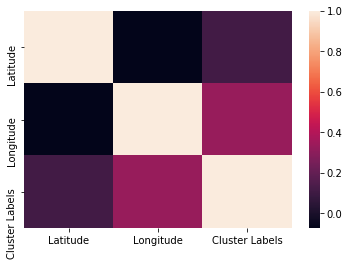

In [48]:
coparis = paris_merged.corr()
sns.heatmap(coparis)

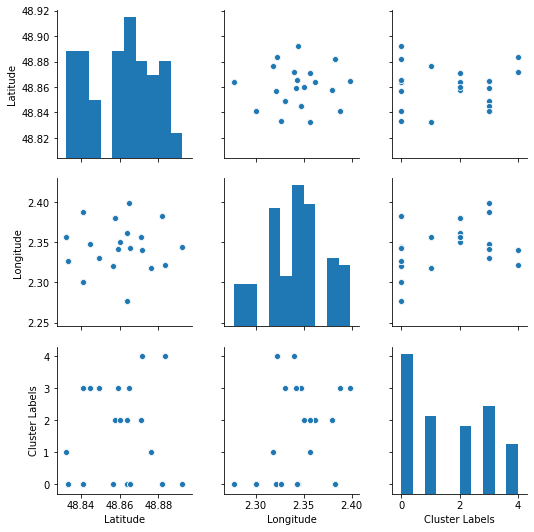

In [93]:
sns.pairplot(paris_merged)

In [49]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,State,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
300,Île-de-France,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
305,Île-de-France,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
550,Île-de-France,2.3561,1,Hotel,Vietnamese Restaurant,Creperie,Pub,Thai Restaurant,Japanese Restaurant,Dessert Shop,Movie Theater,Food & Drink Shop,Concert Hall
321,Île-de-France,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
295,Île-de-France,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
336,Île-de-France,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
544,Île-de-France,2.3561,1,Hotel,Vietnamese Restaurant,Creperie,Pub,Thai Restaurant,Japanese Restaurant,Dessert Shop,Movie Theater,Food & Drink Shop,Concert Hall
293,Île-de-France,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant
594,Île-de-France,2.3561,1,Hotel,Vietnamese Restaurant,Creperie,Pub,Thai Restaurant,Japanese Restaurant,Dessert Shop,Movie Theater,Food & Drink Shop,Concert Hall
307,Île-de-France,2.3183,1,Wine Shop,Food & Drink Shop,Hotel,Theater,Thai Restaurant,Italian Restaurant,Pastry Shop,Korean Restaurant,French Restaurant,Modern European Restaurant


In [50]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,State,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
120,Île-de-France,2.3615,2,Sandwich Place,Wine Bar,Park,Tea Room,Burger Joint,Restaurant,Cocktail Bar,Seafood Restaurant,Farmers Market,Wine Shop
406,Île-de-France,2.3561,2,Pizza Place,Cocktail Bar,Burger Joint,Hotel,Bakery,Cheese Shop,Sandwich Place,Bistro,Wine Shop,Dessert Shop
137,Île-de-France,2.3507,2,Ice Cream Shop,Souvenir Shop,Art Gallery,Art Museum,Cocktail Bar,Fountain,Gourmet Shop,Lebanese Restaurant,Pub,Alsatian Restaurant
446,Île-de-France,2.3795,2,Cocktail Bar,Italian Restaurant,Performing Arts Venue,Pastry Shop,Sandwich Place,Korean Restaurant,Mediterranean Restaurant,Gastropub,Gluten-free Restaurant,Video Game Store
390,Île-de-France,2.3561,2,Pizza Place,Cocktail Bar,Burger Joint,Hotel,Bakery,Cheese Shop,Sandwich Place,Bistro,Wine Shop,Dessert Shop
387,Île-de-France,2.3561,2,Pizza Place,Cocktail Bar,Burger Joint,Hotel,Bakery,Cheese Shop,Sandwich Place,Bistro,Wine Shop,Dessert Shop
439,Île-de-France,2.3795,2,Cocktail Bar,Italian Restaurant,Performing Arts Venue,Pastry Shop,Sandwich Place,Korean Restaurant,Mediterranean Restaurant,Gastropub,Gluten-free Restaurant,Video Game Store
441,Île-de-France,2.3795,2,Cocktail Bar,Italian Restaurant,Performing Arts Venue,Pastry Shop,Sandwich Place,Korean Restaurant,Mediterranean Restaurant,Gastropub,Gluten-free Restaurant,Video Game Store
405,Île-de-France,2.3561,2,Pizza Place,Cocktail Bar,Burger Joint,Hotel,Bakery,Cheese Shop,Sandwich Place,Bistro,Wine Shop,Dessert Shop
413,Île-de-France,2.3561,2,Pizza Place,Cocktail Bar,Burger Joint,Hotel,Bakery,Cheese Shop,Sandwich Place,Bistro,Wine Shop,Dessert Shop


In [51]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,State,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
88,Île-de-France,2.3417,3,Plaza,French Restaurant,Cocktail Bar,Church,Pedestrian Plaza,Chinese Restaurant,Park,Coffee Shop,Art Gallery,Garden
479,Île-de-France,2.3876,3,Chinese Restaurant,Bistro,Wine Bar,Bakery,Furniture / Home Store,Garden,Turkish Restaurant,Creperie,Gourmet Shop,Grocery Store
811,Île-de-France,2.3984,3,Bakery,Plaza,Italian Restaurant,Theater,Japanese Restaurant,Bar,Korean Restaurant,Bookstore,Brasserie,French Restaurant
829,Île-de-France,2.3984,3,Bakery,Plaza,Italian Restaurant,Theater,Japanese Restaurant,Bar,Korean Restaurant,Bookstore,Brasserie,French Restaurant
237,Île-de-France,2.3300,3,Bakery,Plaza,Tailor Shop,Italian Restaurant,Market,French Restaurant,Dessert Shop,Chocolate Shop,Hotel,Beer Bar
209,Île-de-France,2.3471,3,Plaza,French Restaurant,Bar,Korean Restaurant,Monument / Landmark,Science Museum,Ice Cream Shop,Bakery,Creperie,Grocery Store
494,Île-de-France,2.3876,3,Chinese Restaurant,Bistro,Wine Bar,Bakery,Furniture / Home Store,Garden,Turkish Restaurant,Creperie,Gourmet Shop,Grocery Store
471,Île-de-France,2.3876,3,Chinese Restaurant,Bistro,Wine Bar,Bakery,Furniture / Home Store,Garden,Turkish Restaurant,Creperie,Gourmet Shop,Grocery Store
236,Île-de-France,2.3300,3,Bakery,Plaza,Tailor Shop,Italian Restaurant,Market,French Restaurant,Dessert Shop,Chocolate Shop,Hotel,Beer Bar
220,Île-de-France,2.3300,3,Bakery,Plaza,Tailor Shop,Italian Restaurant,Market,French Restaurant,Dessert Shop,Chocolate Shop,Hotel,Beer Bar


In [52]:
paris_merged.loc[paris_merged['Cluster Labels'] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]


,State,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
709,Île-de-France,2.3219,4,French Restaurant,Gym / Fitness Center,Wine Bar,Italian Restaurant,Japanese Restaurant,Farmers Market,Steakhouse,Modern European Restaurant,Bookstore,Deli / Bodega
352,Île-de-France,2.3399,4,Japanese Restaurant,French Restaurant,Coffee Shop,Pedestrian Plaza,Concert Hall,Hotel,Wine Bar,Antique Shop,Grocery Store,Gourmet Shop
348,Île-de-France,2.3399,4,Japanese Restaurant,French Restaurant,Coffee Shop,Pedestrian Plaza,Concert Hall,Hotel,Wine Bar,Antique Shop,Grocery Store,Gourmet Shop
715,Île-de-France,2.3219,4,French Restaurant,Gym / Fitness Center,Wine Bar,Italian Restaurant,Japanese Restaurant,Farmers Market,Steakhouse,Modern European Restaurant,Bookstore,Deli / Bodega
146,Île-de-France,2.3219,4,French Restaurant,Gym / Fitness Center,Wine Bar,Italian Restaurant,Japanese Restaurant,Farmers Market,Steakhouse,Modern European Restaurant,Bookstore,Deli / Bodega
679,Île-de-France,2.3219,4,French Restaurant,Gym / Fitness Center,Wine Bar,Italian Restaurant,Japanese Restaurant,Farmers Market,Steakhouse,Modern European Restaurant,Bookstore,Deli / Bodega
680,Île-de-France,2.3219,4,French Restaurant,Gym / Fitness Center,Wine Bar,Italian Restaurant,Japanese Restaurant,Farmers Market,Steakhouse,Modern European Restaurant,Bookstore,Deli / Bodega
683,Île-de-France,2.3219,4,French Restaurant,Gym / Fitness Center,Wine Bar,Italian Restaurant,Japanese Restaurant,Farmers Market,Steakhouse,Modern European Restaurant,Bookstore,Deli / Bodega
16,Île-de-France,2.3219,4,French Restaurant,Gym / Fitness Center,Wine Bar,Italian Restaurant,Japanese Restaurant,Farmers Market,Steakhouse,Modern European Restaurant,Bookstore,Deli / Bodega
357,Île-de-France,2.3399,4,Japanese Restaurant,French Restaurant,Coffee Shop,Pedestrian Plaza,Concert Hall,Hotel,Wine Bar,Antique Shop,Grocery Store,Gourmet Shop


In [53]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Paris 01 Louvre,Plaza,French Restaurant,Cocktail Bar,Church,Pedestrian Plaza,Chinese Restaurant,Park,Coffee Shop,Art Gallery,Garden
1,0,Paris 02 Bourse,French Restaurant,Plaza,Bakery,Ramen Restaurant,Restaurant,Souvlaki Shop,Perfume Shop,Bookstore,Farmers Market,Coffee Shop
2,2,Paris 03 Temple,Sandwich Place,Wine Bar,Park,Tea Room,Burger Joint,Restaurant,Cocktail Bar,Seafood Restaurant,Farmers Market,Wine Shop
3,2,Paris 04 Hôtel-de-Ville,Ice Cream Shop,Souvenir Shop,Art Gallery,Art Museum,Cocktail Bar,Fountain,Gourmet Shop,Lebanese Restaurant,Pub,Alsatian Restaurant
4,3,Paris 05 Panthéon,Plaza,French Restaurant,Bar,Korean Restaurant,Monument / Landmark,Science Museum,Ice Cream Shop,Bakery,Creperie,Grocery Store


In [95]:
neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Coffee Shop               6
Pub                       5
Café                      4
Hotel                     3
Park                      2
Indian Restaurant         2
Turkish Restaurant        1
Pizza Place               1
Supermarket               1
Fast Food Restaurant      1
Airport Lounge            1
Grocery Store             1
Bookstore                 1
Bus Stop                  1
Furniture / Home Store    1
Bakery                    1
Gym / Fitness Center      1
Name: 1st Most Common Venue, dtype: int64

# London

In [60]:
london = pd.read_csv("London postcodes.csv")
london.dropna()
london.columns

Index(['Postcode', 'In Use?', 'Latitude', 'Longitude', 'Easting', 'Northing',
       'Grid Ref', 'County', 'District', 'Ward', 'District Code', 'Ward Code',
       'Country', 'County Code', 'Constituency', 'Introduced', 'Terminated',
       'Parish', 'National Park', 'Population', 'Households', 'Built up area',
       'Built up sub-division', 'Lower layer super output area', 'Rural/urban',
       'Region', 'Altitude', 'London zone', 'LSOA Code', 'Local authority',
       'MSOA Code', 'Middle layer super output area', 'Parish Code',
       'Census output area', 'Constituency Code',
       'Index of Multiple Deprivation', 'Quality', 'User Type', 'Last updated',
       'Nearest station', 'Distance to station', 'Postcode area',
       'Postcode district', 'Police force', 'Water company', 'Plus Code',
       'Average Income', 'Sewage Company'],
      dtype='object')

In [61]:
london = london.iloc[:,[0,12,7,8,9,2,3]]
london.head()

,Postcode,Country,County,District,Ward,Latitude,Longitude
0,BR1 1AA,England,Greater London,Bromley,Bromley Town,51.401546,0.015415
1,BR1 1AB,England,Greater London,Bromley,Bromley Town,51.406333,0.015208
2,BR1 1AD,England,Greater London,Bromley,Bromley Town,51.400057,0.016715
3,BR1 1AE,England,Greater London,Bromley,Bromley Town,51.404543,0.014195
4,BR1 1AF,England,Greater London,Bromley,Bromley Town,51.401392,0.014948


In [62]:
london.County.value_counts()

Greater London    315439
City of London      6799
Name: County, dtype: int64

In [63]:
london.shape
london.drop('Ward',axis = 1,inplace = True)

In [64]:
london.head()

,Postcode,Country,County,District,Latitude,Longitude
0,BR1 1AA,England,Greater London,Bromley,51.401546,0.015415
1,BR1 1AB,England,Greater London,Bromley,51.406333,0.015208
2,BR1 1AD,England,Greater London,Bromley,51.400057,0.016715
3,BR1 1AE,England,Greater London,Bromley,51.404543,0.014195
4,BR1 1AF,England,Greater London,Bromley,51.401392,0.014948


In [65]:
rlondon = london.sample(frac = 0.0005)
rlondon.head()
rlondon.shape

(161, 6)

In [66]:
rlondon.head()

,Postcode,Country,County,District,Latitude,Longitude
301803,W2 2DZ,England,Greater London,Westminster,51.516564,-0.164851
222116,SW16 6NE,England,Greater London,Wandsworth,51.420689,-0.143395
276643,W11 2DL,England,Greater London,Kensington and Chelsea,51.513885,-0.202647
25661,DA5 1DY,England,Greater London,Bexley,51.440866,0.147384
220566,SW16 1ZJ,England,Greater London,Lambeth,51.430918,-0.130694


In [67]:
address = "London, UK"

geolocator = Nominatim(user_agent="uk_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of London are {}, {}.'.format(latitude, longitude))

The geographical coordinates of London are 51.5073219, -0.1276474.


In [68]:
# create map of Toronto using latitude and longitude values
map_london = folium.Map(location = [latitude, longitude], zoom_start = 11)

# add markers to map
for lat, lng, county, district in zip(rlondon['Latitude'], rlondon['Longitude'], rlondon['County'], rlondon['District']):
    label = '{}, {}'.format(county, district)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_london)  
    
map_london

In [69]:
CLIENT_ID = 'SM01TBQJTIDR3CPBI4F5TSUJFYKGXH0J2F2LJGBPHTPVJG3S' # Foursquare ID
CLIENT_SECRET = 'ITSPGF0DHYWTHSROYXLXBY5OMMT3OCPTQBAVVD2VZHMA1KRJ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: SM01TBQJTIDR3CPBI4F5TSUJFYKGXH0J2F2LJGBPHTPVJG3S
CLIENT_SECRET:ITSPGF0DHYWTHSROYXLXBY5OMMT3OCPTQBAVVD2VZHMA1KRJ


In [71]:
# Get data of first neighborhood
neighborhood_latitude = rlondon['Latitude'][301803] 
neighborhood_longitude = rlondon['Longitude'][301803] 
district_name = rlondon['District'][301803] 

print('Latitude and longitude values of {} are {}, {}.'.format(district_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Westminster are 51.516564, -0.164851.


In [72]:
LIMIT = 10 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis = 1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lord Wargrave,Pub,51.518067,-0.165719
1,Waitrose & Partners,Supermarket,51.517538,-0.165777
2,Green Valley,Convenience Store,51.515157,-0.162306
3,Casa Malevo,Argentinian Restaurant,51.514574,-0.165366
4,Briciole,Italian Restaurant,51.519063,-0.163988


In [73]:
london_venues = getNearbyVenues(names = rlondon['District'],
                                   latitudes = rlondon['Latitude'],
                                   longitudes = rlondon['Longitude']
                                  )

Westminster
Wandsworth
Kensington and Chelsea
Bexley
Lambeth
Croydon
Sutton
Lewisham
Hillingdon
Hounslow
Islington
Hackney
Ealing
Bexley
Greenwich
Newham
Tower Hamlets
Hackney
Westminster
Hillingdon
Westminster
Southwark
Barnet
Westminster
Lambeth
Westminster
Hammersmith and Fulham
Kingston upon Thames
City of London
Merton
Kensington and Chelsea
Barking and Dagenham
Hackney
Hackney
Enfield
Kensington and Chelsea
Richmond upon Thames
Westminster
Brent
Tower Hamlets
Sutton
Harrow
Greenwich
Hammersmith and Fulham
Lewisham
Croydon
Southwark
Tower Hamlets
Barking and Dagenham
Merton
Croydon
Enfield
Greenwich
Merton
Waltham Forest
Westminster
Havering
Camden
Hillingdon
Sutton
Havering
Southwark
Westminster
Kingston upon Thames
Ealing
Hillingdon
Hillingdon
Westminster
Camden
Tower Hamlets
Croydon
Enfield
Hillingdon
Newham
Westminster
Islington
Hillingdon
Enfield
Haringey
Brent
Havering
Camden
Kensington and Chelsea
Hammersmith and Fulham
Sutton
Richmond upon Thames
Haringey
Islington
Westmin

In [74]:
london_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westminster,51.516564,-0.164851,Lord Wargrave,51.518067,-0.165719,Pub
1,Westminster,51.516564,-0.164851,Waitrose & Partners,51.517538,-0.165777,Supermarket
2,Westminster,51.516564,-0.164851,Green Valley,51.515157,-0.162306,Convenience Store
3,Westminster,51.516564,-0.164851,Casa Malevo,51.514574,-0.165366,Argentinian Restaurant
4,Westminster,51.516564,-0.164851,Briciole,51.519063,-0.163988,Italian Restaurant


In [75]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barking and Dagenham,13,13,13,13,13,13
Barnet,37,37,37,37,37,37
Bexley,39,39,39,39,39,39
Brent,34,34,34,34,34,34
Bromley,9,9,9,9,9,9
Camden,60,60,60,60,60,60
City of London,20,20,20,20,20,20
Croydon,27,27,27,27,27,27
Ealing,33,33,33,33,33,33


In [76]:
print('There are {} unique categories.'.format(len(london_venues['Venue Category'].unique())))

There are 220 unique categories.


In [77]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix = "", prefix_sep = "")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Westminster,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Westminster,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped.head()

,Neighborhood,Accessories Store,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Windmill,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Barking and Dagenham,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barnet,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.054054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.0,0.0,0.051282,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brent,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bromley,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pub,Park,Locksmith,Bar,History Museum,Chinese Restaurant,Plaza,Automotive Shop,Auto Garage,Gas Station
1,Barnet,Bakery,Coffee Shop,Café,Grocery Store,Italian Restaurant,Turkish Restaurant,Chinese Restaurant,Supermarket,Park,Pharmacy
2,Bexley,Pub,Bakery,Fast Food Restaurant,Hotel,Italian Restaurant,Pharmacy,American Restaurant,Coffee Shop,Clothing Store,Sandwich Place
3,Brent,Pub,Grocery Store,Gym / Fitness Center,Supermarket,Coffee Shop,Theme Restaurant,Indian Restaurant,Middle Eastern Restaurant,Pizza Place,Dessert Shop
4,Bromley,Hotel,Gym / Fitness Center,Gastropub,Supermarket,Park,Train Station,Locksmith,Pub,Pool,Farm


In [81]:
# set number of clusters
kclusters = int(len(rlondon["District"].unique()) / 4)
london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state = 1).fit(london_grouped_clustering)

In [82]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,7,Barking and Dagenham,Pub,Park,Locksmith,Bar,History Museum,Chinese Restaurant,Plaza,Automotive Shop,Auto Garage,Gas Station
1,0,Barnet,Bakery,Coffee Shop,Café,Grocery Store,Italian Restaurant,Turkish Restaurant,Chinese Restaurant,Supermarket,Park,Pharmacy
2,4,Bexley,Pub,Bakery,Fast Food Restaurant,Hotel,Italian Restaurant,Pharmacy,American Restaurant,Coffee Shop,Clothing Store,Sandwich Place
3,6,Brent,Pub,Grocery Store,Gym / Fitness Center,Supermarket,Coffee Shop,Theme Restaurant,Indian Restaurant,Middle Eastern Restaurant,Pizza Place,Dessert Shop
4,1,Bromley,Hotel,Gym / Fitness Center,Gastropub,Supermarket,Park,Train Station,Locksmith,Pub,Pool,Farm


In [83]:
london_merged = rlondon

# merge london_grouped with london_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

london_merged.head() # check the last columns!

,Postcode,Country,County,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
301803,W2 2DZ,England,Greater London,Westminster,51.516564,-0.164851,1,Hotel,Coffee Shop,Bakery,Indian Restaurant,Sandwich Place,Plaza,Italian Restaurant,Cocktail Bar,Gastropub,French Restaurant
222116,SW16 6NE,England,Greater London,Wandsworth,51.420689,-0.143395,6,Café,Coffee Shop,Italian Restaurant,Japanese Restaurant,Bus Stop,Gym / Fitness Center,Pub,Supermarket,Sushi Restaurant,Gastropub
276643,W11 2DL,England,Greater London,Kensington and Chelsea,51.513885,-0.202647,1,Café,Pub,Restaurant,Exhibit,Supermarket,Ice Cream Shop,Bakery,Gym / Fitness Center,Cupcake Shop,Boutique
25661,DA5 1DY,England,Greater London,Bexley,51.440866,0.147384,4,Pub,Bakery,Fast Food Restaurant,Hotel,Italian Restaurant,Pharmacy,American Restaurant,Coffee Shop,Clothing Store,Sandwich Place
220566,SW16 1ZJ,England,Greater London,Lambeth,51.430918,-0.130694,0,Coffee Shop,Pizza Place,Indian Restaurant,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Pub,Creperie,Café,Chinese Restaurant,Ramen Restaurant


In [94]:
london_merged['1st Most Common Venue'].value_counts()

Coffee Shop               27
Hotel                     26
Café                      23
Pub                       18
Park                      12
Airport Lounge             9
Bakery                     6
Indian Restaurant          6
Supermarket                5
Fast Food Restaurant       5
Gym / Fitness Center       5
Grocery Store              5
Bus Stop                   5
Bookstore                  3
Pizza Place                3
Furniture / Home Store     2
Turkish Restaurant         1
Name: 1st Most Common Venue, dtype: int64

In [84]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start = 11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(
        london_merged['Latitude'], 
        london_merged['Longitude'], 
        london_merged['District'], 
        london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [86]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
220566,England,-0.130694,0,Coffee Shop,Pizza Place,Indian Restaurant,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Pub,Creperie,Café,Chinese Restaurant,Ramen Restaurant
144940,England,-0.199119,0,Bakery,Coffee Shop,Café,Grocery Store,Italian Restaurant,Turkish Restaurant,Chinese Restaurant,Supermarket,Park,Pharmacy
236596,England,-0.122288,0,Coffee Shop,Pizza Place,Indian Restaurant,Caribbean Restaurant,Vegetarian / Vegan Restaurant,Pub,Creperie,Café,Chinese Restaurant,Ramen Restaurant
279375,England,-0.252677,0,Coffee Shop,Café,Thai Restaurant,Middle Eastern Restaurant,Kebab Restaurant,Grocery Store,Bakery,Jazz Club,Hotel,Food Court
281450,England,-0.210448,0,Coffee Shop,Café,Thai Restaurant,Middle Eastern Restaurant,Kebab Restaurant,Grocery Store,Bakery,Jazz Club,Hotel,Food Court
112823,England,-0.126649,0,Coffee Shop,Pub,Café,Bakery,Organic Grocery,Grocery Store,Greek Restaurant,Tapas Restaurant,Lounge,French Restaurant
281282,England,-0.208082,0,Coffee Shop,Café,Thai Restaurant,Middle Eastern Restaurant,Kebab Restaurant,Grocery Store,Bakery,Jazz Club,Hotel,Food Court
111786,England,-0.142849,0,Coffee Shop,Pub,Café,Bakery,Organic Grocery,Grocery Store,Greek Restaurant,Tapas Restaurant,Lounge,French Restaurant
111500,England,-0.142849,0,Coffee Shop,Pub,Café,Bakery,Organic Grocery,Grocery Store,Greek Restaurant,Tapas Restaurant,Lounge,French Restaurant
112817,England,-0.136994,0,Coffee Shop,Pub,Café,Bakery,Organic Grocery,Grocery Store,Greek Restaurant,Tapas Restaurant,Lounge,French Restaurant


In [87]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
301803,England,-0.164851,1,Hotel,Coffee Shop,Bakery,Indian Restaurant,Sandwich Place,Plaza,Italian Restaurant,Cocktail Bar,Gastropub,French Restaurant
276643,England,-0.202647,1,Café,Pub,Restaurant,Exhibit,Supermarket,Ice Cream Shop,Bakery,Gym / Fitness Center,Cupcake Shop,Boutique
17954,England,-0.152747,1,Indian Restaurant,Mediterranean Restaurant,Gym / Fitness Center,Platform,Train Station,Pet Store,Garden Center,Financial or Legal Service,Event Service,Spanish Restaurant
306918,England,-0.262587,1,Bookstore,Soccer Field,Bakery,Park,Playground,Convenience Store,Polish Restaurant,Pub,Burger Joint,Fruit & Vegetable Store
60472,England,-0.091870,1,Coffee Shop,Pub,Café,Park,Food Truck,Theater,Pizza Place,Gym / Fitness Center,Hotel,Cocktail Bar
50004,England,-0.040781,1,Café,Park,Coffee Shop,Italian Restaurant,Nature Preserve,Restaurant,Reservoir,Pub,Sandwich Place,Farmers Market
52759,England,0.066242,1,Furniture / Home Store,Pub,Hotel,Portuguese Restaurant,Shopping Plaza,Café,Sandwich Place,Mediterranean Restaurant,Clothing Store,Light Rail Station
38234,England,-0.005194,1,Hotel,Park,Gym / Fitness Center,Italian Restaurant,Pub,Coffee Shop,Sandwich Place,Canal Lock,Turkish Restaurant,Hotel Bar
54904,England,-0.066650,1,Café,Park,Coffee Shop,Italian Restaurant,Nature Preserve,Restaurant,Reservoir,Pub,Sandwich Place,Farmers Market
299439,England,-0.139899,1,Hotel,Coffee Shop,Bakery,Indian Restaurant,Sandwich Place,Plaza,Italian Restaurant,Cocktail Bar,Gastropub,French Restaurant


In [88]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
237519,England,-0.226633,2,Pizza Place,Pool,Park,Train Station,Indian Restaurant,Road,Fast Food Restaurant,Filipino Restaurant,English Restaurant,Farm
210483,England,-0.199812,2,Pizza Place,Pool,Park,Train Station,Indian Restaurant,Road,Fast Food Restaurant,Filipino Restaurant,English Restaurant,Farm
236910,England,-0.238339,2,Pizza Place,Pool,Park,Train Station,Indian Restaurant,Road,Fast Food Restaurant,Filipino Restaurant,English Restaurant,Farm


In [89]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79195,England,-0.329686,3,Indian Restaurant,Chinese Restaurant,Pharmacy,Sandwich Place,Clothing Store,Portuguese Restaurant,Coffee Shop,Ice Cream Shop,Diner,Event Service


In [90]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25661,England,0.147384,4,Pub,Bakery,Fast Food Restaurant,Hotel,Italian Restaurant,Pharmacy,American Restaurant,Coffee Shop,Clothing Store,Sandwich Place
259940,England,-0.431080,4,Airport Lounge,Pub,Coffee Shop,Pharmacy,Seafood Restaurant,Grocery Store,Supermarket,Bus Stop,Chinese Restaurant,Indian Restaurant
26652,England,0.147539,4,Pub,Bakery,Fast Food Restaurant,Hotel,Italian Restaurant,Pharmacy,American Restaurant,Coffee Shop,Clothing Store,Sandwich Place
268492,England,-0.414525,4,Airport Lounge,Pub,Coffee Shop,Pharmacy,Seafood Restaurant,Grocery Store,Supermarket,Bus Stop,Chinese Restaurant,Indian Restaurant
101822,England,-0.287042,4,Pub,Italian Restaurant,Indian Restaurant,Hotel,Pharmacy,Park,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Pizza Place
217452,England,-0.236326,4,Pub,Italian Restaurant,Park,Coffee Shop,Plaza,Café,Gift Shop,Supermarket,Tapas Restaurant,Restaurant
272458,England,-0.457397,4,Airport Lounge,Pub,Coffee Shop,Pharmacy,Seafood Restaurant,Grocery Store,Supermarket,Bus Stop,Chinese Restaurant,Indian Restaurant
102976,England,-0.292849,4,Pub,Italian Restaurant,Indian Restaurant,Hotel,Pharmacy,Park,Coffee Shop,Seafood Restaurant,Japanese Restaurant,Pizza Place
269480,England,-0.393036,4,Airport Lounge,Pub,Coffee Shop,Pharmacy,Seafood Restaurant,Grocery Store,Supermarket,Bus Stop,Chinese Restaurant,Indian Restaurant
273419,England,-0.476712,4,Airport Lounge,Pub,Coffee Shop,Pharmacy,Seafood Restaurant,Grocery Store,Supermarket,Bus Stop,Chinese Restaurant,Indian Restaurant


In [91]:
london_merged.loc[london_merged['Cluster Labels'] == 5, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
100150,England,0.022536,5,Turkish Restaurant,Italian Restaurant,Steakhouse,Theater,Pub,Hotel,Deli / Bodega,Filipino Restaurant,Financial or Legal Service,Ethiopian Restaurant


In [92]:
london_merged.loc[london_merged['Cluster Labels'] == 6, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Country,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
222116,England,-0.143395,6,Café,Coffee Shop,Italian Restaurant,Japanese Restaurant,Bus Stop,Gym / Fitness Center,Pub,Supermarket,Sushi Restaurant,Gastropub
212262,England,-0.134832,6,Park,Coffee Shop,Pub,Supermarket,Bar,Pharmacy,Grocery Store,Italian Restaurant,Bakery,Sandwich Place
204890,England,-0.038334,6,Grocery Store,Convenience Store,Coffee Shop,Pub,Gym / Fitness Center,Café,Discount Store,Pizza Place,Playground,Furniture / Home Store
270633,England,-0.367218,6,Gym / Fitness Center,Grocery Store,Pub,Park,Bakery,Hotel,Metro Station,Fast Food Restaurant,Middle Eastern Restaurant,Breakfast Spot
188590,England,0.075670,6,Bus Stop,Grocery Store,Fast Food Restaurant,Supermarket,Pub,Garden,Health & Beauty Service,Playground,Rugby Pitch,Fish & Chips Shop
72077,England,-0.045745,6,Fast Food Restaurant,Grocery Store,Soccer Field,Pub,Café,Pizza Place,Supermarket,Garden,Tennis Court,Gas Station
162040,England,-0.280250,6,Pub,Grocery Store,Gym / Fitness Center,Supermarket,Coffee Shop,Theme Restaurant,Indian Restaurant,Middle Eastern Restaurant,Pizza Place,Dessert Shop
105420,England,-0.244227,6,Park,Coffee Shop,Pub,Supermarket,Bar,Pharmacy,Grocery Store,Italian Restaurant,Bakery,Sandwich Place
178025,England,0.001691,6,Bus Stop,Grocery Store,Fast Food Restaurant,Supermarket,Pub,Garden,Health & Beauty Service,Playground,Rugby Pitch,Fish & Chips Shop
193653,England,-0.053119,6,Grocery Store,Convenience Store,Coffee Shop,Pub,Gym / Fitness Center,Café,Discount Store,Pizza Place,Playground,Furniture / Home Store
